Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85       247
           1       0.36      0.57      0.44        47

    accuracy                           0.77       294
   macro avg       0.63      0.69      0.65       294
weighted avg       0.82      0.77      0.79       294



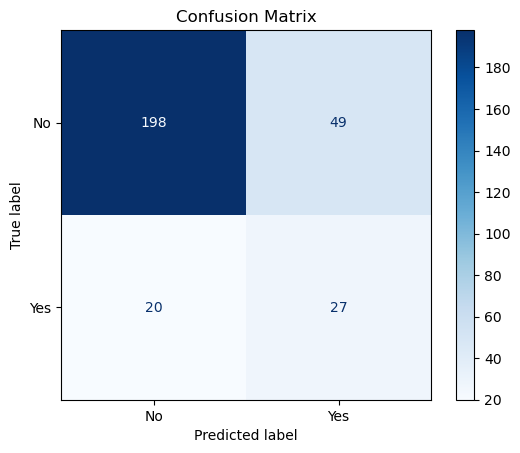

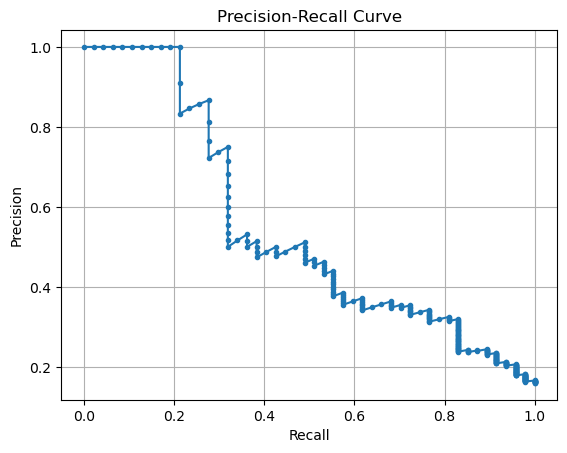

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Load data
df = pd.read_excel("HR_Attrition_Cleaned.xlsx")

# 🎯 Separate target and features
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# 🔍 Identify column types
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# ⚙️ Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# 🧪 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🔄 Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# ⚖️ Balance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)

# 🧠 Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

# 🔍 Predict and evaluate
y_pred = model.predict(X_test_processed)
y_probs = model.predict_proba(X_test_processed)[:, 1]

# 🧾 Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 📊 Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 📈 Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()
